# Mobile Games A/B Testing with Cookie Cats

Project Description
Cookie Cats is a hugely popular mobile puzzle game developed by Tactile Entertainment. It's a classic "connect three" style puzzle game where the player must connect tiles of the same color in order to clear the board and win the level. It also features singing cats. We're not kidding! Check out this short demo:

As players progress through the game they will encounter gates that force them to wait some time before they can progress or make an in-app purchase. In this project, we will analyze the result of an A/B test where the first gate in Cookie Cats was moved from level 30 to level 40. In particular, we will analyze the impact on player retention.

Dataset is collected from https://www.datacamp.com/projects/184

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sms

%matplotlib inline

In [2]:
df = pd.read_csv('cookie_cats.csv')

In [3]:
tab_info = pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info = tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
print ('-' * 10 + " Display information about column types and number of null values " + '-' * 10 )
print 
display(tab_info)

---------- Display information about column types and number of null values ----------


,userid,version,sum_gamerounds,retention_1,retention_7
column type,int64,object,int64,bool,bool
null values (nb),0,0,0,0,0
null values (%),0,0,0,0,0


2. The AB-test data
The data we have is from 90,189 players that installed the game while the AB-test was running. The variables are:

userid - a unique number that identifies each player.
version - whether the player was put in the control group (gate_30 - a gate at level 30) or the group with the moved gate (gate_40 - a gate at level 40).
sum_gamerounds - the number of game rounds played by the player during the first 14 days after install.
retention_1 - did the player come back and play 1 day after installing?
retention_7 - did the player come back and play 7 days after installing?
When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40. As a sanity check, let's see if there are roughly the same number of players in each AB group.

In [4]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [5]:
#df['retention_1'] = df['retention_1'].map({True: 1, False: 0})
#df['retention_7'] = df['retention_7'].map({True: 1, False: 0})
df[['retention_1','retention_7']] = df[['retention_1','retention_7']].astype(int)
df['version'] = df['version'].map({'gate_30': "Control", 'gate_40':"Experimental" })

In [6]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,Control,3,0,0
1,337,Control,38,1,0
2,377,Experimental,165,1,0
3,483,Experimental,1,0,0
4,488,Experimental,179,1,1


In [7]:
count_df = df.groupby('version')['userid'].count().head(100)

In [8]:
x = df['version'].value_counts()
print("Number of Users Percentage\n{}\n{}\nNumber of Users values count\n{}\n{}".format(
      50*"-", x / len(df.index) * 100, 50*"-", x))

Number of Users Percentage
--------------------------------------------------
Experimental    50.437415
Control         49.562585
Name: version, dtype: float64
Number of Users values count
--------------------------------------------------
Experimental    45489
Control         44700
Name: version, dtype: int64


In [9]:
plot_df = df.groupby('sum_gamerounds')['userid'].count().head(100).reset_index()

Text(0,0.5,'User Count')

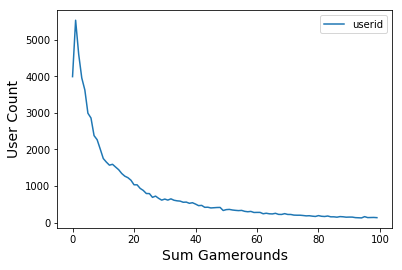

In [10]:

ax = plot_df.plot(x ='sum_gamerounds' ,y ='userid')
ax.set_xlabel('Sum Gamerounds', fontsize=14)
ax.set_ylabel('User Count',  fontsize=14)

In [11]:
def ecdf(data):
    n= len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y

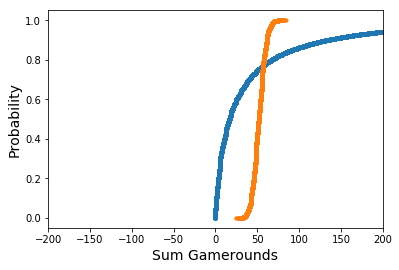

In [27]:
x_test , y_test = ecdf(df['sum_gamerounds'])
mean = np.mean(df['sum_gamerounds'])
std = np.std(df['sum_gamerounds'])

samples = np.random.poisson(mean,  size=100000)

x_normal , y_normal = ecdf(samples)

_ =plt.plot(x_test, y_test, marker='.', linestyle='none')
_ =plt.plot(x_normal , y_normal, marker='.', linestyle='none')
_ = plt.xlabel('Sum Gamerounds', fontsize=14)
_ = plt.ylabel('Probability', fontsize=14)
_ = plt.xlim(-200,200)
plt.show()

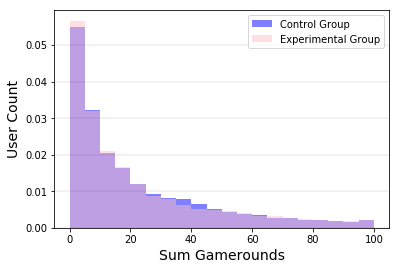

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data
y1 = df['sum_gamerounds'][df['version']=='Control']
y2 = df['sum_gamerounds'][df['version']=='Experimental']


# Plot regular histograms
plt.figure()
plt.hist(y1, facecolor='blue', range=[0,100], alpha = .5, bins =20, align='mid', label='Control Group', normed = True)
plt.hist(y2, facecolor='pink', range=[0,100], alpha = .5,bins =20, align='mid', label='Experimental Group', normed = True)

plt.xlabel('Sum Gamerounds', fontsize=14)
plt.ylabel('User Count', fontsize=14)
plt.grid(color='black', linestyle='-', linewidth=.1, axis = 'y')
plt.legend(loc='upper right')
plt.show()

In [14]:
df_cr = df.groupby('version').agg({'retention_1':sum , 'retention_7':sum,'userid':'count'}).reset_index()

In [15]:
df_cr

,version,retention_1,retention_7,userid
0,Control,20034,8502,44700
1,Experimental,20119,8279,45489


In [16]:
df_cr['Conversion_rate1'] = df_cr['retention_1']/(df_cr['userid'])
df_cr['Conversion_rate7'] = df_cr['retention_7']/(df_cr['userid'])

In [17]:
df_cr

,version,retention_1,retention_7,userid,Conversion_rate1,Conversion_rate7
0,Control,20034,8502,44700,0.448188,0.190201
1,Experimental,20119,8279,45489,0.442283,0.182000


In [18]:
df.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,Control,3,0,0
1,337,Control,38,1,0
2,377,Experimental,165,1,0
3,483,Experimental,1,0,0
4,488,Experimental,179,1,1


It appears that there was a slight decrease in 1-day retention when the gate was moved to level 40 (44.2%) compared to the control when it was at level 30 (44.8%). It's a small change, but even small changes in retention can have a large impact. But while we are certain of the difference in the data, how certain should we be that a gate at level 40 will be worse in the future?

There are a couple of ways we can get at the certainty of these retention numbers. Here we will use bootstrapping: We will repeatedly re-sample our dataset (with replacement) and calculate 1-day retention for those samples. The variation in 1-day retention will give us an indication of how uncertain the retention numbers are.

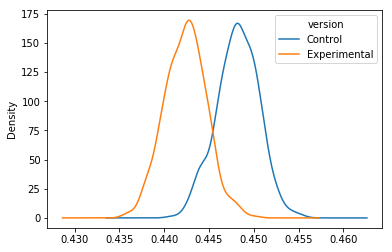

In [19]:
boot_1d = []
iterations =500
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_1d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_1d = pd.DataFrame(boot_1d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
# ... YOUR CODE FOR TASK 6 ...

_=  boot_1d.plot.kde() 

In [20]:
boot_1d.head()

version,Control,Experimental
retention_1,0.448811,0.443628
retention_1,0.445459,0.440185
retention_1,0.452219,0.439168
retention_1,0.447803,0.443191
retention_1,0.450079,0.443688


7. Zooming in on the difference
These two distributions above represent the bootstrap uncertainty over what the underlying 1-day retention could be for the two AB-groups. Just eyeballing this plot, we can see that there seems to be some evidence of a difference, albeit small. Let's zoom in on the difference in 1-day retention

(Note that in this notebook we have limited the number of bootstrap replication to 500 to keep the calculations quick. In "production" we would likely increase this to a much larger number, say, 10 000.)

Compare how much larger (in%) Control results is compared to Experimental results

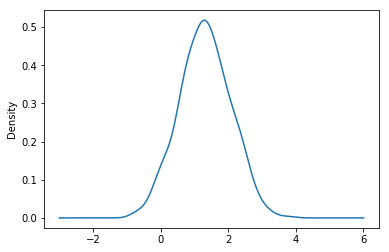

In [21]:
boot_1d['diff'] = (boot_1d['Control']- boot_1d['Experimental'])/boot_1d['Experimental']*100
ax = boot_1d['diff'].plot.kde()

. The probability of a difference¶

From this chart, we can see that the most likely % difference is around 1% - 2%, and that most of the distribution is above 0%, in favor of a gate at level 30. But what is the probability that the difference is above 0%? Let's calculate that as well.

In [22]:
# Calculating the probability that 1-day retention is greater when the gate is at level 30
prob = (boot_1d['diff'] > 0).sum() / len(boot_1d['diff'])
# Pretty printing the probability
print(prob)

0.958


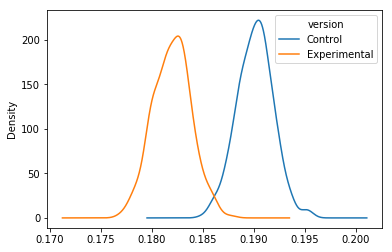

In [23]:
boot_7d = []
iterations =500
for i in range(iterations):
    boot_mean = df.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_7d.append(boot_mean)
    
# Transforming the list to a DataFrame
boot_7d = pd.DataFrame(boot_7d)
    
# A Kernel Density Estimate plot of the bootstrap distributions
# ... YOUR CODE FOR TASK 6 ...

_=  boot_7d.plot.kde() 

Text(0.5,0,'% Difference in means')

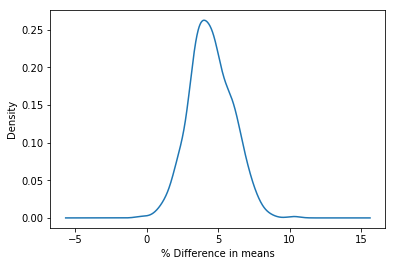

In [24]:
boot_7d['diff'] = (boot_7d['Control']- boot_7d['Experimental'])/boot_7d['Experimental']*100

ax = boot_7d['diff'].plot.kde()
ax.set_xlabel('% Difference in means')

In [25]:
# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob = (boot_7d['diff'] > 0).sum() / len(boot_7d['diff'])

We keep the gate at level 30 which is the Control group. It gave us a more succesful output

In [26]:
# Calculating the probability that 7-day retention is greater when the gate is at level 30
prob

0.998